# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements.

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "ayodejiadesegun"
kaggle_key = "d275c02aa04f6c0b324a02426528cd9f"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!pip install kaggle
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 414MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
# Create the train dataset in pandas by reading the csv
train = pd.read_csv("data/train.csv")
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train["datetime"] = pd.to_datetime(train["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("data/test.csv")
test["datetime"] = pd.to_datetime(test["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
# Same thing as train and test dataset
submission = pd.read_csv("data/sampleSubmission.csv")

submission["datetime"] = pd.to_datetime(submission["datetime"])

submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
label_column = "count"
eval_metric = "root_mean_squared_error"

# Fit the TabularPredictor with specific configurations
predictor = TabularPredictor(
    label=label_column,
    eval_metric=eval_metric
).fit(
    train_data=train.drop(columns=["casual", "registered"]),
    time_limit=600,
    presets="best_quality"
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250908_140732"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.33 GB / 12.67 GB (89.4%)
Disk Space Avail:   64.45 GB / 107.72 GB (59.8%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the opti

(_ray_fit pid=3084) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=3308) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=3367) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=3367) [2000]	valid_set's rmse: 126.702
(_ray_fit pid=3367) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=3367) [4000]	valid_set's rmse: 125.904
(_ray_fit pid=3443) [1000]	valid_set's rmse: 135.845
(_ray_fit pid=3443) [4000]	valid_set's rmse: 133.013 [repeated 6x across cluster]


(_ray_fit pid=3367) 	Ran out of time, early stopping on iteration 8171. Best iteration is:
(_ray_fit pid=3367) 	[7106]	valid_set's rmse: 125.339


(_ray_fit pid=3443) [7000]	valid_set's rmse: 132.416 [repeated 4x across cluster]


(_ray_fit pid=3443) 	Ran out of time, early stopping on iteration 8353. Best iteration is:
(_ray_fit pid=3443) 	[7329]	valid_set's rmse: 132.331


(_ray_fit pid=3597) [1000]	valid_set's rmse: 137.712 [repeated 2x across cluster]
(_ray_fit pid=3597) [4000]	valid_set's rmse: 135.344 [repeated 3x across cluster]
(_ray_fit pid=3669) [3000]	valid_set's rmse: 138.261 [repeated 5x across cluster]


(_ray_fit pid=3597) 	Ran out of time, early stopping on iteration 7333. Best iteration is:
(_ray_fit pid=3597) 	[6258]	valid_set's rmse: 135.071
(_dystack pid=2905) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2905) 	104.84s	 = Training   runtime
(_dystack pid=2905) 	17.51s	 = Validation runtime
(_dystack pid=2905) Fitting model: WeightedEnsemble_L2 ... Training model for up to 141.99s of the 24.63s of remaining time.
(_dystack pid=2905) 	Ensemble Weights: {'LightGBMXT_BAG_L1': 1.0}
(_dystack pid=2905) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2905) 	0.01s	 = Training   runtime
(_dystack pid=2905) 	0.0s	 = Validation runtime
(_dystack pid=2905) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=2905) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 24.61s of the 24.59s of remaining time.
(_dystack pid=2905) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 wo

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    22.886417
1    41.493725
2    46.419151
3    49.850590
4    52.060696
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean       99.828476
std        88.940979
min         3.248616
25%        19.430878
50%        64.154572
75%       165.576035
max       359.686462
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
len(predictions[predictions < 0])

0

In [ ]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submissions/submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submissions/submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 380kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv               2023-11-10 17:15:04  first raw submission  complete  1.79645      1.79645       
submission_new_features.csv  2023-11-03 19:54:40  new features          complete  0.63507      0.63507       
submission.csv               2023-11-03 19:18:18  first raw submission  complete  1.79656      1.79656       
submission.csv               2023-11-03 19:04:16  first raw submission  complete  1.80075      1.80075       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

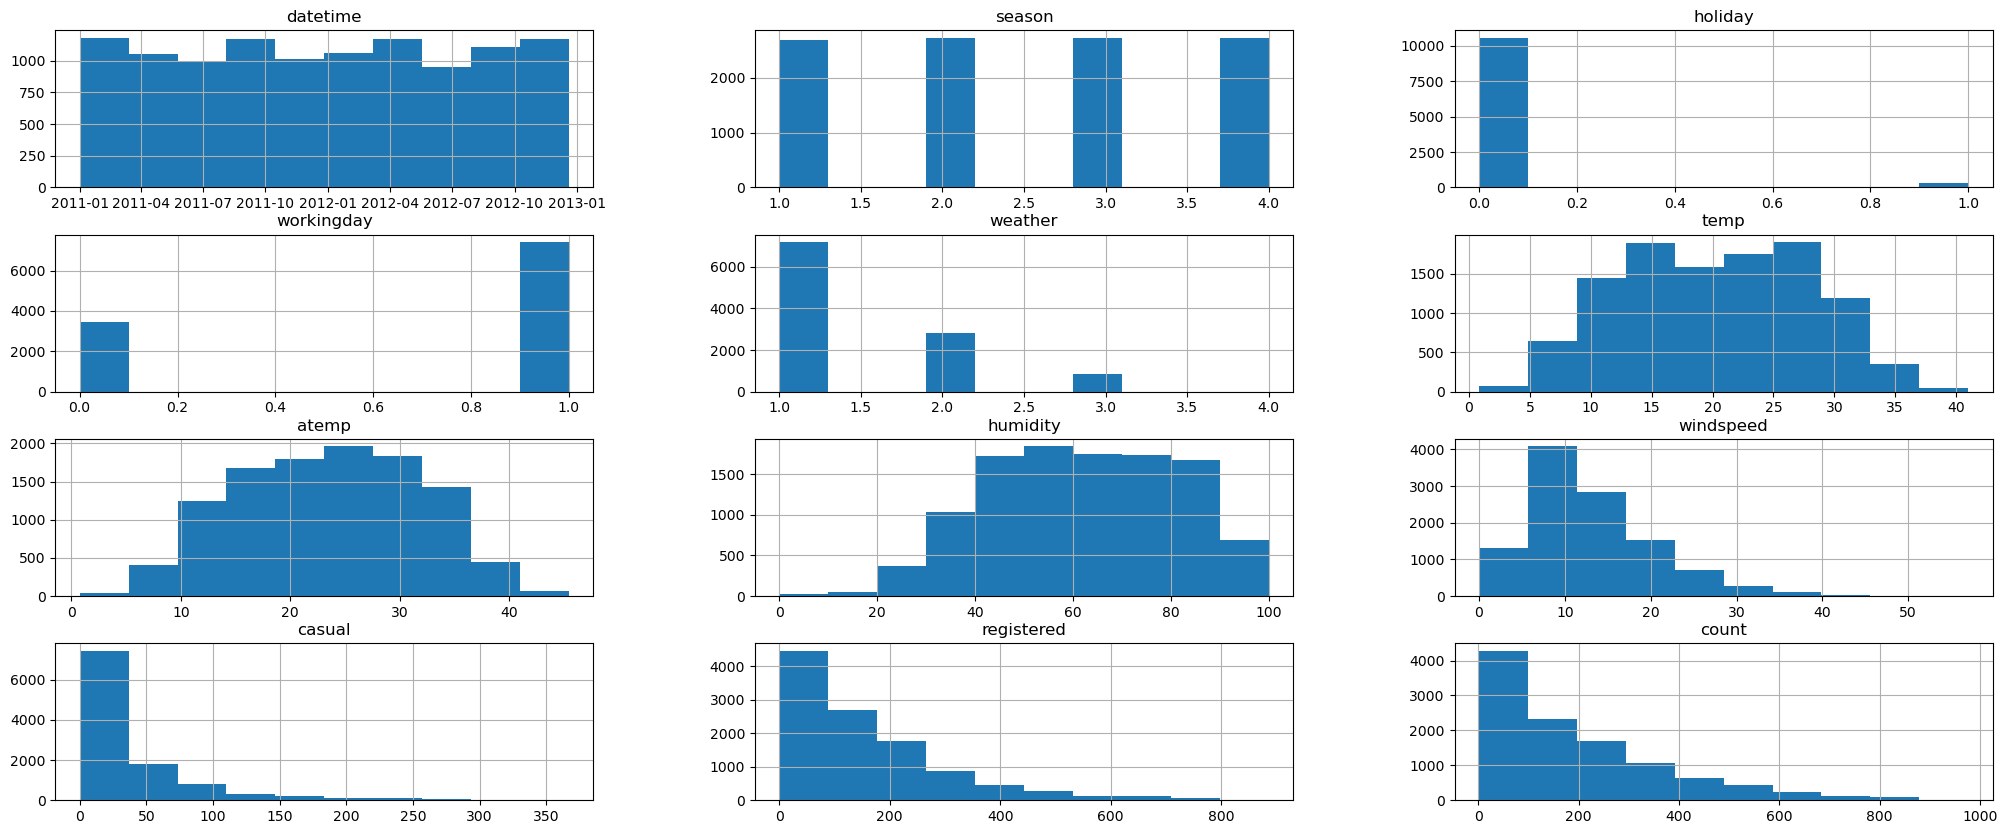

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(25, 10))

In [ ]:
# create a new feature
train["hour"] = train["datetime"].dt.hour
train["day"] = train["datetime"].dt.day
train["month"] = train["datetime"].dt.month

test["hour"] =  test["datetime"].dt.hour
test["day"] =  test["datetime"].dt.day
test["month"] =  test["datetime"].dt.month

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
categorical_columns = ["season", "weather"]

train[categorical_columns] = train[categorical_columns].astype("category")

test[categorical_columns] = test[categorical_columns].astype("category")


In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


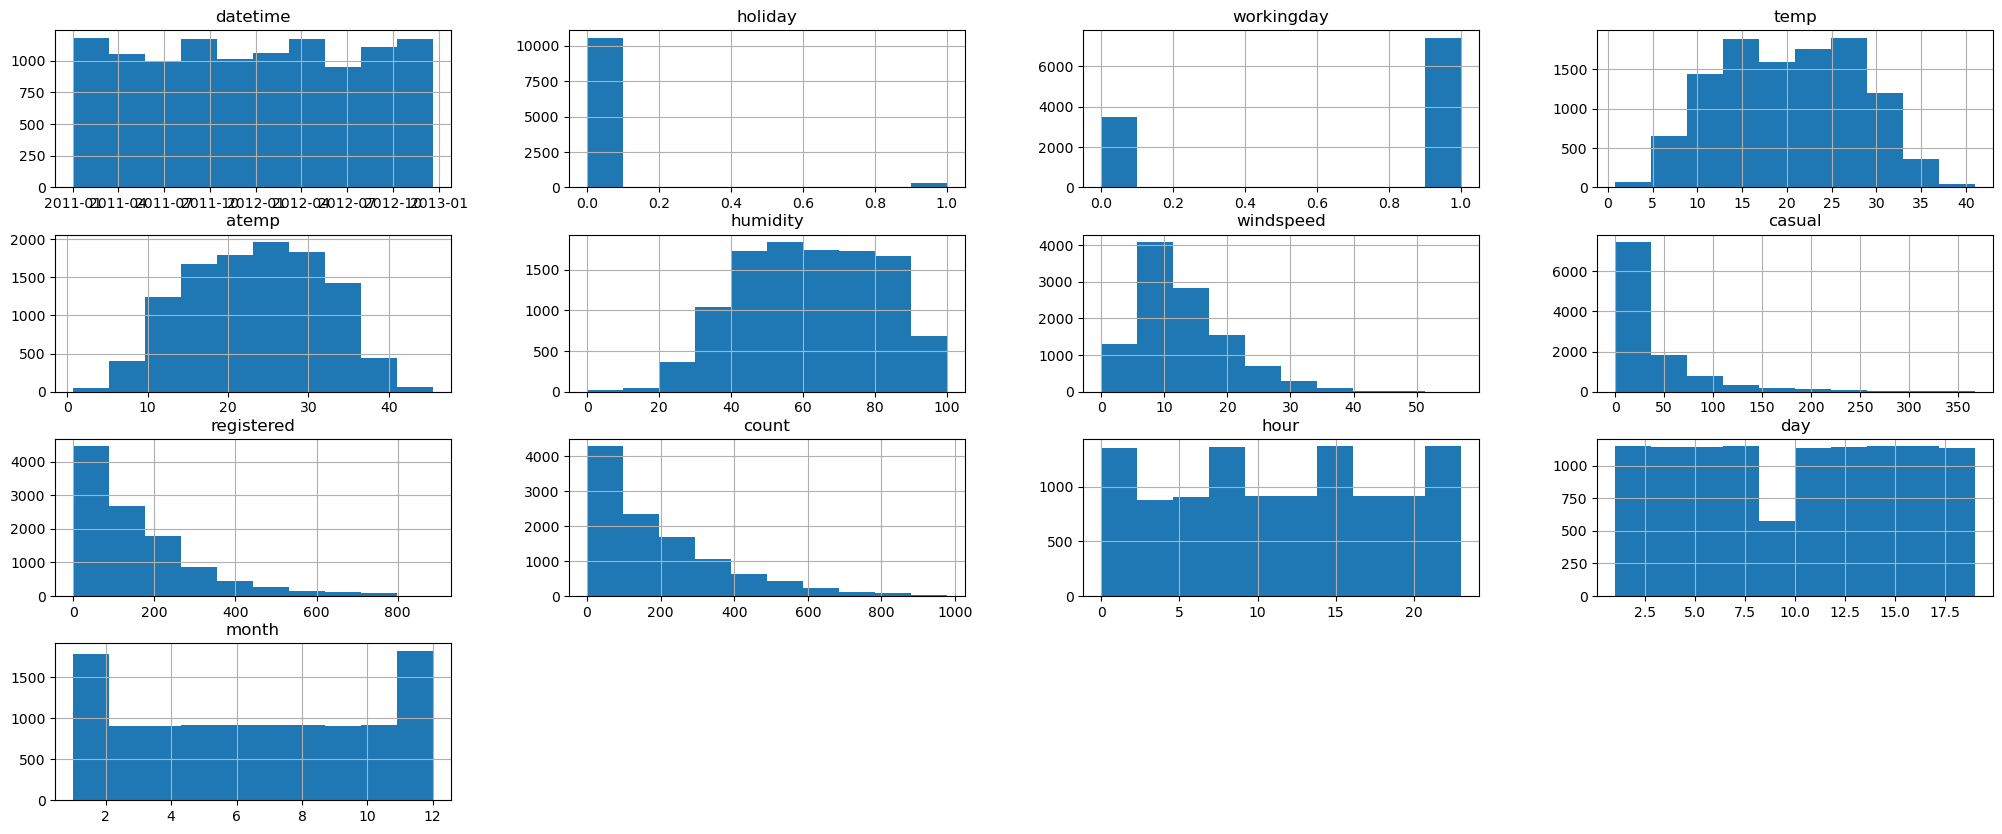

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(25, 10));

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error").fit(
        train_data=train.drop(columns=["casual", "registered"]),
        time_limit=600,
        presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20231110_173936/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20231110_173936/"
AutoGluon Version:  0.8.2
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Sep 26 09:59:02 UTC 2023
Disk Space Avail:   9223372027.82 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.213165      25.950475  520.409923                0.001002           0.445807            3       True         14
1          LightGBM_BAG_L2  -30.553094      24.444045  428.702138                0.502030          25.496712            2       True         11
2          CatBoost_BAG_L2  -30.664476      24.024267  459.801525                0.082252          56.596099            2       True         13
3        LightGBMXT_BAG_L2  -31.117343      25.365191  437.871305                1.423176          34.665878            2       True         10
4   RandomForestMSE_BAG_L2  -31.700670      24.826680  445.335382                0.884664          42.129956            2       True         12
5      WeightedEnsemble_L2  -32.263908      22.445700  354.612570         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58154263993599,
  'KNeighborsDist_BAG_L1': -84.1428655345568,
  'LightGBMXT_BAG_L1': -34.51903091052003,
  'LightGBM_BAG_L1': -33.916920183144725,
  'RandomForestMSE_BAG_L1': -38.413

In [ ]:
# Remember to set all negative values to zero
predictions.describe()
predictions_new = predictor_new_features.predict(test)
predictions_new[predictions_new < 0] = 0
predictions_new.head()

0    16.306274
1    11.025932
2    10.447458
3     9.059841
4     7.981426
Name: count, dtype: float32

In [ ]:
# Same submitting predictions
submission_new_features = pd.read_csv("data/sampleSubmission.csv")
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submissions/submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submissions/submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 347kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-11-10 18:27:04  new features                       complete  0.65632      0.65632       
submission_new_hpo.csv       2023-11-10 17:49:42  new features with hyperparameters  complete  0.468        0.468         
submission_new_features.csv  2023-11-10 17:26:40  new features                       complete  0.67263      0.67263       
submission.csv               2023-11-10 17:15:04  first raw submission               complete  1.79645      1.79645       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
import autogluon.core as ag

# Specify hyperparameter values for neural network models
nn_params = {
    "num_epochs": 10,  # Number of training epochs
    "learning_rate": ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # Learning rate
    "activation": ag.space.Categorical("relu", "softrelu", "tanh"),  # Activation function
    "dropout_prob": ag.space.Real(0.0, 0.5, default=0.1)  # Dropout probability
}

# Specify hyperparameter values for LightGBM gradient boosted trees
gbm_params = {
    "num_boost_round": 100,  # Number of boosting rounds to control training time of GBM models
    "num_leaves": ag.space.Int(lower=26, upper=66, default=36)  # Number of leaves in trees
}

# Specify hyperparameter values for different types of models
hyperparameters = {
    "GBM": gbm_params,
    "NN_TORCH": nn_params
}

# Specify hyperparameter tuning options
hyperparameter_tune_kwargs = {
    "num_trials": 5,  # Try at most 5 different hyperparameter configurations for each type of model
    "scheduler": "local",  # Use a local scheduler
    "searcher": "auto"  # Use an automatic searcher
}

predictor_new_hpo = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error").fit(
        train_data=train.drop(columns=["casual", "registered"]),
        time_limit=900,
        presets="best_quality",
        hyperparameters=hyperparameters,
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
        num_bag_sets=1
)

In [ ]:
predictor_new_hpo.fit_summary()

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [ ]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("data/sampleSubmission.csv")
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submissions/submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submissions/submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

In [ ]:
# Take the 3 test evaluation scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [-52.785675, -30.438726, -36.344086]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('images/model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "eval_metric": ["root_mean_squared_error", "root_mean_squared_error", "root_mean_squared_error"],
    "presets": ["best_quality", "best_quality", "best_quality"],
    "num_bag_sets": [None, None, 1],
    "time_limit": [600, 600, 900],
    "score": [ 1.8007, 0.63507, 0.468]
})